<a href="https://colab.research.google.com/github/MarielGomezRan/G35.-Modulo-II-Modelos-Estad-sticos/blob/main/3.%20Estad%C3%ADstica%20Inferencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Módulo II: Técnicas Estadísticas
# 3. Estadística Inferencial
### **Alumna: Mariel Gómez Rangel**




**Introducción**

En este cuaderno se abordarán los conceptos fundamentales de la estadística inferencial, partiendo de la definición de estimadores y el análisis de sus principales propiedades. Posteriormente, se desarrollará la construcción e interpretación de intervalos de confianza, así como la formulación y aplicación de pruebas de hipótesis.

## 1. Estimadores y sus Propiedades


### 1.1 Estimadores


Un estimador es una regla o fórmula que se utiliza para calcular un valor aproximado de un parámetro poblacional a partir de una muestra.

Sean $Y_1,…,Y_n$ variables aleatorias independientes $\sim$ $\mathcal{N}$($μ,θ$)
$$
\Rightarrow \overline{Y} = \frac{1}{n} \sum_{i=1}^{n} Y_i \sim \mathcal{N}\left( \mu, \frac{\sigma^2}{n} \right)
$$

Estandarizamos y entonces:

$$
Z_i = \frac{Y_i - \mu}{\sqrt{\sigma^2}} = \frac{Y_i - \mu}{\sigma} \sim \mathcal{N}(0, 1)
$$

Ahora, si tomamos

$$
\sum_{i=1}^{n} Z_i^2 = \sum_{i=1}^{n} \left( \frac{Y_i - \mu}{\sigma} \right)^2 \sim x^2_n
\quad \text{(n = grados de libertad)}
$$

Entonces

$$
Z_i^2 \sim x^2_1
$$

Si queremos hacer inferencias acerca de la media de una población normal $μ$ con $σ^2$ desconocida, se puede estimar, es decir, queremos conocer el **"mejor parámetro"**, entonces:

**Estimadores**:  $T(X_1, \ldots, X_n)$

$$
T(X_1, X_2) = \frac{X_1 + X_2}{n}
$$

$$
T(X_1, \ldots, X_n) = \frac{X_1 + \cdots + X_n}{n}
$$

$$
(X_1, \ldots, X_n) \text{ m.a.} \xrightarrow{\text{ajuste}} \text{Distribución}
$$

$$
\Theta = \left\{ \theta \mid \theta \text{ es parámetro de la distribución} \right\} \subseteq \mathbb{R}
$$

$$
\mathbb{E}[X_i] < \infty, \quad \mathrm{Var}(X) < \infty
$$


Sea $(X_1, \ldots, X_n)$ v.a.i. cada una con $f_{X_i}(x_i)$, entonces el conjunto de v.a. $ X_1, \ldots, X_n$ se denomina una **muestra aleatoria** de tamaño n.

Cualquier función real de una muestra aleatoria $T(X_1, \ldots, X_n)$ se llama **estadístico**.

Sea $X$ una v.a. con función de densidad $f(x; \theta)$, que depende de los parámetros desconocidos $\theta$. Sea $(X_1, \ldots, X_n)$ una m.a. de $X$, se tiene:

$$
f({x;θ})=f(x_1, \ldots, x_n ; \theta) = \prod_{i=1}^{n} f(x_i \mid \theta)
$$

donde \( x_i \) son los valores de los datos.

Un **estimador** de $\theta$ es cualquier estadístico $T(X_1, \ldots, X_n)$  y se denota por:

$$
\hat{\theta} = T(X_1, \ldots, X_n)
$$

**Nota**: Recordemos que un estimador es una variable aleatoria.

Los estimadores pueden ser:
- **Puntuales:** en función de un solo valor  
- **Intervalo:** en función de un rango de valores

### 1.2 Propiedades:
- **Insesgadez**: Un estimador es insesgado si su valor esperado es igual al parámetro que está estimando. En otras palabras, no tiene sesgo sistemático.
- **Consistencia**: Un estimador es consistente si, a medida que aumenta el tamaño de la muestra, el valor estimado se acerca al valor verdadero del parámetro.
- **Eficiencia**: Un estimador es eficiente si tiene la menor varianza entre los estimadores insesgados.



**Ejemplo:** Estimador insesgado

In [ ]:
# Importamos las librerías necesarias
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

# Establecemos el estilo de los gráficos
sns.set(style="whitegrid")


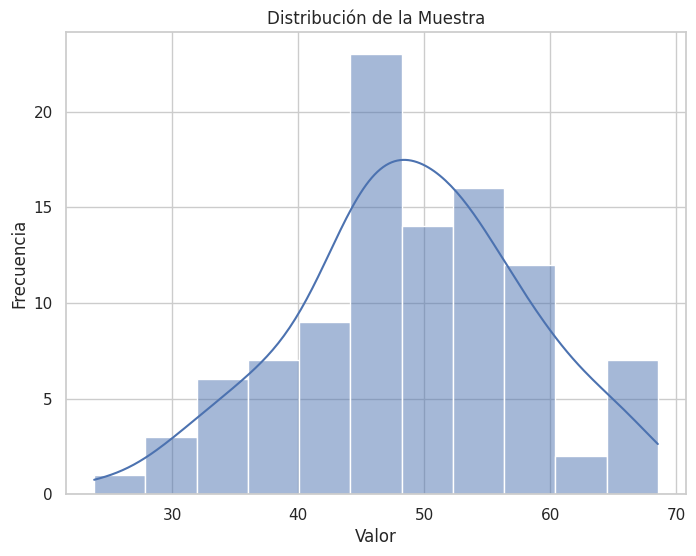

In [ ]:
# Generamos una muestra aleatoria
np.random.seed(42)
muestra = np.random.normal(loc=50, scale=10, size=100)

# Calculamos el estimador de la media
estimador_media = np.mean(muestra)
estimador_media

# Gráfico de la muestra
plt.figure(figsize=(8,6))
sns.histplot(muestra, kde=True)
plt.title("Distribución de la Muestra")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

### 1.3 Notas:
**Propiedades de la invarianza:**

Si $\hat{\theta}$ es **EMV** de $\theta$ pero nos interesa estimar a una función de $\theta$, digamos $\tau(\theta)$, entonces
$$\hat{\tau(\theta)}=\tau(\hat{\theta})$$
De forma que:
$$\hat{\theta}=\bar{X}$$ es **EMV** de $\theta$
$$\Rightarrow τ(\theta)=\theta^2$$
$$\Rightarrow \hat{\tau(\theta)}=(\bar{X})^2$$

***Ejemplo:***

Si
$$X_1,…,X_n \sim \mathcal{exp}(\lambda)$$
Entonces:
$$\hat{\theta}_1=X_1$$
$$\hat{\theta}_2=\frac{X_1+X_2}{2}$$
$$\hat{\theta}_3=\frac{X_1+2X_2}{3}$$
Los cuales son estimadores de mínima varinza

**Error Cuadrático Medio:**

El ECM mide el promedio de los cuadros de los errores, es decir, la diferencia cuadrática promedio entre los valores estimados y el valor verdadero.

$$ECM(\theta)^2=E[(\hat{\theta}-θ)^2]$$
$$ECM(\theta)^2=Var(\hat{\theta})+(E[\hat{\theta}]-θ)^2$$
En donde $(E[\hat{\theta}]-θ)^2$ respresenta el sesgo.

**Teorema de Fisher - Neymar:**

Si $X_1,…,X_n$ es una variable aleatoria con m.a con función de distribución $f(x,θ)$

Sea $T=t(x_1,…,x_n)$ es una estadística cuya f.d.p es $g(t,θ)$.

Entonces T es suficiente para $θ$ si y sólo si:
$$L(x_1,…,x_n;θ)=H(x_1,…,x_n)g(l(x_1,…,x_n);θ)$$

**Estimadores UMVUE:**

Los estimadores UMVUE, son los estimadores insesgados de varianza uniforme mínima.

Sea $X_1,…,X_n$ una m.a de $f(x,θ)$, un estimador  $$T^*=t(x_1,…,x_n)$$ de $τ(θ)$ se define como UMVUE de $τ(θ)$ si y sólo si cumple:


1.   $E[T^*]=\tau(θ)$ $…$  (insesgado)
2.   $Var (T^*) \leq Var (T)$ $…$ para cualquier otro estimador insesgado $T=t(x_1,…,x_n)$ de $τ(θ)$



**Desigualdad de Crámer-Rao**

La desigualdad establece un límite inferior para la varianza de cualquier estimador

$$Var(T)\geq \frac{[\tau'(\theta)]^2}{nE[(\frac{\sigma ln f(x;\theta))}{\sigma \theta})^2]}$$

Si $Var(T)$ alcanza el límite inferior ⇒ **el estimador es insesgado óptimo**

## 2. Intervalos de Confianza



Un intervalo de confianza es un rango de valores que, con una cierta probabilidad, contiene el valor del parámetro poblacional.

**Definición:**

Sea $X_1,…,X_n$ una m.a con $f(x;θ)$.

Sean $T_1=t_1(X_1,…,X_n)$ y $T_2=t_2(X_1,…,X_n)$ dos estadísticos, tal que $T_1 \leq T_2$

$$P(T_1 \leq \tau(\theta) \leq T_2) = \alpha$$

Al intervalo aleatorio $(T_1,T_2)$ se le llama intervalo del $\alpha$ x 100$\%$ de confianza.

Sea $X_1,\dots,X_n$ una m.a con  $X_i \sim \mathcal{N}(\mu, \sigma^2)$. El error estándar (SE) medirá cuanto varía una estadística:

1.   Si la SE $\tau$ y en tamaño de la muestra es n:
$$SE=\frac{\tau}{\sqrt{n}}$$
2.   Si no conozco $\tau$, entonces usamos la desviación estándar muestral s:
$$SE=\frac{s}{\sqrt{n}}$$
3. Mientras mayor sea N $⇒$ menor será SE



### 2.1 Intervalo de Confianza para la media de una distribución normal (σ conocida)



Sea $X_1, \dots, X_n$ una m.a. $X_i \sim \mathcal{N}(\mu, \sigma^2)$. Entonces:

- $\bar{X} \sim \mathcal{N}(\mu, \frac{\sigma^2}{n})$
- $Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \sim \mathcal{N}(0,1)$

**Nivel de significancia (error): $\alpha$**

El intervalo de confianza se basa en que:
$$
\mathbb{P}\left( -z_{\alpha/2} < \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} < z_{\alpha/2} \right)
= \mathbb{P}\left( \bar{X} - z_{\alpha/2} \frac{\sigma}{\sqrt{n}} < \mu < \bar{X} + z_{\alpha/2} \frac{\sigma}{\sqrt{n}} \right)
= 1 - \alpha
$$

**El intervalo del $(1 - \alpha) \cdot 100\%$ de confianza para $\mu$ (con $\sigma$ conocida) es:**

$$
\left( \bar{X} - z_{\alpha/2} \frac{\sigma}{\sqrt{n}}, \quad \bar{X} + z_{\alpha/2} \frac{\sigma}{\sqrt{n}} \right)
$$
donde

- $\sigma$ = desviación estándar  
- $\frac{\sigma}{\sqrt{n}}$ = error estándar de la media  
- $z_{\alpha/2}$ determina el nivel de confianza  
- El intervalo está centrado en $\bar{X}$

**Observación**

- A mayor $n$, menor es el error estándar, y el intervalo de confianza es más pequeño.
- Esto hace que se acerque más a la media $\mu$, es decir, que haya menor variación.

**Ejemplo 1** Para tratar de estimar la media de consumo por cliente en un gran restaurante, se reunieron datos de una muestra de 49 clientes durante 3 semanas.

**a)** Supongamos que la **desviación estándar de la población** es de $\$2.50$. ¿Cuál es el error estándar de la media?

**b)** Con un nivel de confianza del $95\%$, ¿cuál es el margen de error?

**c)** Si la **media de la muestra** es de $\$22.60$, cuál es el intervalo de confianza del $95\%$ para la media de la población?

In [ ]:
# Datos
n=49
sigma = 2.50
media_muestral = 22.60
confianza = 0.95

# a) Error estándar de la media
error_estandar = sigma / np.sqrt(n)
#error_estandar
print(f" a) Error estándar de la media: {error_estandar:.2f}")

# b) Margen de error
z = st.norm.ppf(1-(1-confianza) / 2)
margen_error = z * error_estandar
#margen_error
print(f" b) Margen de error con 95% de confianza: {margen_error:.2f}")

# c)
limite_inferior = media_muestral - margen_error
limite_superior = media_muestral + margen_error
print(f" c) Intervalo de confianza del 95%: ({limite_inferior:.2f},{limite_superior:.2f})")

 a) Error estándar de la media: 0.36
 b) Margen de error con 95% de confianza: 0.70
 c) Intervalo de confianza del 95%: (21.90,23.30)


$1-\alpha=.95$, implica que $z_{\alpha/2} = z_{0.025} = 1.96$

**Ejemplo 2** Supongamos que se toma una muestra aleatoria de 100 personas para estimar la media del peso de una población, y se obtiene que la media muestral es de $70$ kg con una desviación estándar que es conocida de $10$ kg. Para un nivel de confianza del $95\%$, calcular el intervalo de confianza

In [ ]:
# Datos
n = 100
media_muestral = 70
sigma = 10
nivel_confianza = 0.95
error_estandar = sigma / np.sqrt(n)

#Utilizaremos la función scipy.stats.norm.interval
# Sintaxis
# scipy.stats.norm.interval(confidence, loc = media, scale = error_estandar )

intervalo = st.norm.interval(confidence = nivel_confianza, loc = media_muestral, scale = error_estandar)
print(f"Intervalo de confianza del 95% es: {intervalo}")


Intervalo de confianza del 95% es: (np.float64(68.04003601545995), np.float64(71.95996398454005))


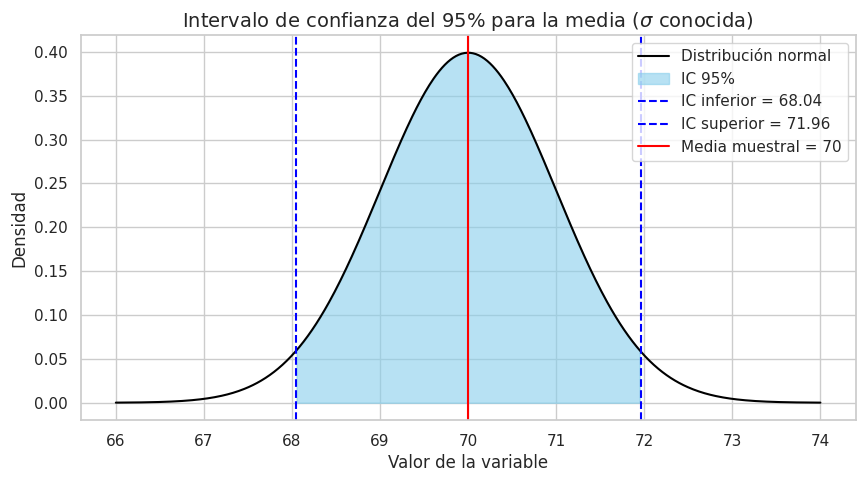

In [ ]:
# Puntos para graficar la curva normal
x = np.linspace(media_muestral - 4*error_estandar, media_muestral + 4*error_estandar, 500)
y = st.norm.pdf(x, loc=media_muestral, scale=error_estandar)

# Gráfica
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Distribución normal', color='black')

# Sombrear el intervalo de confianza
plt.fill_between(x, y, where=(x >= intervalo[0]) & (x <= intervalo[1]), color='skyblue', alpha=0.6, label='IC 95%')

# Líneas verticales
plt.axvline(intervalo[0], color='blue', linestyle='--', label=f'IC inferior = {intervalo[0]:.2f}')
plt.axvline(intervalo[1], color='blue', linestyle='--', label=f'IC superior = {intervalo[1]:.2f}')
plt.axvline(media_muestral, color='red', linestyle='-', label=f'Media muestral = {media_muestral}')

plt.title('Intervalo de confianza del 95% para la media ($\\sigma$ conocida)', fontsize=14)
plt.xlabel('Valor de la variable')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

### 2.2 Intervalo de Confianza para la media $\mu$ de una distribución normal ($\sigma$ deconocida)



Sea $X_1, \dots, X_n$ una m.a. $X_i \sim \mathcal{N}(\mu, \sigma^2)$. Entonces:

- $\bar{X} \sim \mathcal{N}(\mu, \frac{\sigma^2}{n})$
- $Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \sim \mathcal{N}(0,1)$

Si el tamaño de la muestra es menor a 30, se utiliza la $t$:

**Estadístico t**

Definimos el estadístico $t$ de la siguiente manera:
$$T = \frac{\bar{X}-\mu}{s/\sqrt{n}} \sim t_{(n-1)} $$

**El intervalo del $(1 - \alpha) \cdot 100\%$ de confianza para $\mu$ (con $\sigma$ desconocida) es:**

$$
\left( \bar{X} - t_{\alpha/2} \frac{s}{\sqrt{n}}, \quad \bar{X} + t_{\alpha/2} \frac{s}{\sqrt{n}} \right)
$$
donde

- $s$ = desviación estándar muestral
- $\frac{s}{\sqrt{n}}$ = error estándar de la media  
- $t_{\alpha/2}$ determina el nivel de confianza  
- El intervalo está centrado en $\bar{X}$

**Ejemplo 3** Supongamos que tenemos los siguientes datos
$$ datos = [45, 55, 67, 45, 68, 79, 98, 87, 84, 82] $$
Calcular un intervalo de confianza para la media.

In [ ]:
# Datos del ejemplo
data = [45, 55, 67, 45, 68, 79, 98, 87, 84, 82]
confidence = 0.95
gl = len(data) - 1 # grados de liber

# Media y error estandar
mean = np.mean(data)
error_est = st.sem(data)

# Intervalo de confianza usando t de Student
intervalo = st.t.interval(confidence, gl, loc = mean, scale = error_est)

print(f"Media muestral: {mean:.2f}")
print(f"Error estandar: {error_est:.2f}")
print(f"El intervalo de confianza del 95% es: {intervalo}")

Media muestral: 71.00
Error estandar: 5.75
El intervalo de confianza del 95% es: (np.float64(58.000521742293884), np.float64(83.99947825770612))


**Ejemplo 4** Los artículos de cerámica utilizados sobre velas electricas sobrecargadas se rompen con diferentes presiones. Supongamos que los datos provienen de una distribución normal.

La resistencia a la ruptura fue medida en una muestra de 100 artículos, y el promedio fue de $1750$ con un desviación estándar de 315.8

**a)** Estimar con un nivel del confianza del $90\%$ a la media poblacional de la presión de la ruptura.

**b)** Estimar con un nivel del confianza del $90\%$ a la varianza poblacional.

In [ ]:
from scipy.stats import chi2
# datos
n = 100
media_muestral = 1750
desv_estandar_muestral = 315.8
confianza = 0.90

# a) Usar la normal ya que el tamaño de la muestra es grande
error_est = desv_estandar_muestral / np.sqrt(n)
error_est
intervalo_media = st.norm.interval(confidence=confianza, loc = media_muestral, scale = error_est)
print(f"El intervalo de confianza del 90% es: {intervalo_media}")

# b) Intervalo de confianza para la varianza (usar chi-cuadrada)
alpha = 1-confianza
gl = n-1
s2 = desv_estandar_muestral**2

#Cuantiles de la chi-cuadrada
chi2_inf = st.chi2.ppf(alpha / 2,df=gl)
chi2_sup = st.chi2.ppf(1- alpha / 2,df=gl)

# Intervalo de confianza
intervalo_varianza = ((gl * s2) / chi2_sup, (gl * s2) / chi2_inf )
print(f"El intervalo de confianza del 90% es: {intervalo_varianza}")

#Otra forma
chi2_low, chi2_high = chi2.interval(confianza,df=gl)
intervalo_varianza1 = ((gl * s2) / chi2_high, (gl * s2) / chi2_low )
print(f"El intervalo de confianza del 90% es: {intervalo_varianza1}")

El intervalo de confianza del 90% es: (np.float64(1698.0555224608725), np.float64(1801.9444775391275))
El intervalo de confianza del 90% es: (np.float64(80123.48643850331), np.float64(128146.71537457063))
El intervalo de confianza del 90% es: (np.float64(80123.48643850331), np.float64(128146.71537457063))


**Ejemplo 5**  El artículo *"Evaluation of a Ventilation Strategy to Prevent Barotrauma in Patients at High Risk for Acute Respiratory Distress Syndrome"* reportó sobre un experimento con 120 pacientes con anestesistas en cuidados intensivos (UCI), los cuales fueron divididos al azar en dos grupos, donde cada uno esta compuesto por 60 pacientes.

- Grupo A: promedio de permanencia = 14.1 horas
- Grupo B: promedio de permanencia = 17.5 horas
- Desviación estándar en ambos = 5.1 hrs

Encontrar un intervalo del $95\%$ de confianza para la diferecia de medias poblacionales: $(\mu_A - \mu_B)$  

In [ ]:
#Datos
n1 = 60
n2 = 60
media1 = 14.1
media2 = 17.5
sigma = 5.1
confianza = 0.95
alpha = 1-confianza
#gl = n1 + n2 -2

#valor critico
z = st.norm.ppf(1 - alpha / 2)

#Error estandar
error_est = sigma * np.sqrt(1/n1 + 1/n2)
dif_medias = media1 - media2
margen_error = z *error_est

lim_inf = dif_medias - margen_error
lim_sup = dif_medias + margen_error
print(f"Diferencia de las medias: {dif_medias:.2f}")
print(f"Intervalo de confianza del 95%: ({lim_inf:.2f},{lim_sup:.2f})")

Diferencia de las medias: -3.40
Intervalo de confianza del 95%: (-5.22,-1.58)


### 2.3 Tarea Intervalos de Confianza

**Ejercicio 1:** En una encuesta de una Universidad, 225 estudiantes son seleccionados al azar de los que toman cálculo y se les pregunta si cálculo es su materia favorita. 100 estudiantes responden que el cálculo es su materia favorita. Proporcione un intervalo de confianza del 95 %  para la proporción de todos los estudiantes que toman cálculo y que la consideran su materia favorita.  

In [ ]:
# Datos
n = 225
x = 100
confianza = 0.95
alpha = 1 - confianza

# Calcular el intervalo de confianza
p_hat = x / n
error_estandar = np.sqrt((p_hat * (1 - p_hat)) / n)
valor_critico = st.norm.ppf(1 - alpha / 2)
margen_error = valor_critico * error_estandar
limite_inferior = p_hat - margen_error
limite_superior = p_hat + margen_error
print(f"Intervalo de confianza del {confianza*100}% para la proporción: ({limite_inferior:.4f}, {limite_superior:.4f})")

Intervalo de confianza del 95.0% para la proporción: (0.3795, 0.5094)


**Ejercicio 2:** Los datos $1.2,\ 2.1,\ 2.3,\ 1.9,\ 3.0,\ 1.5,\ 2.8,\ 2.4,\ 1.7,\ 2.6,\ 2.0,\ 1.8,\ 3.1,\ 2.2,\ 2.5$ se toman a partir de una distribución normal $N(\mu,\sigma^2)$ con $\mu$ desconocida.

**a)** Encuentra un intervalo de confianza al nivel de $90\%$ para $\mu$, dado que $\sigma =2$.

**b)** Encuentra un intervalo de confianza al nivel de $90\%$ para $\mu$.

**c)** Encuentra un intervalo de confianza al nivel de $90\%$ para $\sigma^2$.

In [ ]:
# Datos
data = np.array([1.2, 2.1, 2.3, 1.9, 3.0, 1.5, 2.8, 2.4, 1.7, 2.6, 2.0, 1.8, 3.1, 2.2, 2.5])
n = len(data)
confianza = 0.90
alpha = 1 - confianza
media_muestral = np.mean(data)
grados_libertad = n - 1

# a) Intervalo de confianza para μ con σ = 2 (conocida)
sigma_conocida = 2
valor_critico_z = st.norm.ppf(1 - alpha / 2)
error_estandar_z = sigma_conocida / np.sqrt(n)
margen_error_z = valor_critico_z * error_estandar_z
limite_inferior_z = media_muestral - margen_error_z
limite_superior_z = media_muestral + margen_error_z
print(f"a) Intervalo de confianza del {confianza*100}% para μ (σ conocida): ({limite_inferior_z:.2f}, {limite_superior_z:.2f})")

# b) Intervalo de confianza para μ con σ desconocida
desviacion_estandar_muestral = np.std(data, ddof=1)
valor_critico_t = st.t.ppf(1 - alpha / 2, grados_libertad)
error_estandar_t = desviacion_estandar_muestral / np.sqrt(n)
margen_error_t = valor_critico_t * error_estandar_t
limite_inferior_t = media_muestral - margen_error_t
limite_superior_t = media_muestral + margen_error_t
print(f"b) Intervalo de confianza del {confianza*100}% para μ (σ desconocida): ({limite_inferior_t:.2f}, {limite_superior_t:.2f})")

# c) Intervalo de confianza para σ²
varianza_muestral = np.var(data, ddof=1)
chi2_inferior = st.chi2.ppf(alpha / 2, grados_libertad)
chi2_superior = st.chi2.ppf(1 - alpha / 2, grados_libertad)
limite_inferior_varianza = (n - 1) * varianza_muestral / chi2_superior
limite_superior_varianza = (n - 1) * varianza_muestral / chi2_inferior
print(f"c) Intervalo de confianza del {confianza*100}% para μ (σ conocida): ({limite_inferior_varianza:.2f}, {limite_superior_varianza:.2f})")

a) Intervalo de confianza del 90.0% para μ (σ conocida): (1.36, 3.06)
b) Intervalo de confianza del 90.0% para μ (σ desconocida): (1.96, 2.45)
c) Intervalo de confianza del 90.0% para μ (σ conocida): (0.18, 0.63)


**Ejercicio 3:** Los ingresos semanales promedio de las personas que trabajan en varias industrias aparecieron en el *The New York Times 1988 Almanac*.  
Esos ingresos para quienes trabajan en los servicios fueron de $\$369$. Suponga que este resultado se basó en una muestra de 250 personas dedicadas a los servicios y que la desviación estándar de la muestra fue de $\$50$. Calcula el intervalo de confianza del 95% para la media de la población de ingresos semanales de personas que trabajan en los servicios.

In [ ]:
# Datos
media_muestral = 369
n = 250
desviacion_estandar_muestral = 50
confianza = 0.95
alpha = 1 - confianza

# Calcular el error estándar
error_estandar = desviacion_estandar_muestral / np.sqrt(n)

# Calcular el intervalo de confianza
intervalo = st.norm.interval(confidence=confianza, loc=media_muestral, scale=error_estandar)

print(f"Intervalo de confianza del {confianza*100}% para la media de la población: ({limite_inferior:.2f}, {limite_superior:.2f})")

Intervalo de confianza del 95.0% para la media de la población: (0.38, 0.51)


**Ejercicio 4:** En un estudio de préstamos a estudiantes, el Departamento de Educación informó que los beneficiarios del fondo Stafford Loan deberían un promedio de \$12,658 al recibirse (*USA Today*, 5 de abril de 1995). Suponga que este promedio de deuda se basa en una muestra de 480 préstamos a estudiantes y que la desviación estándar de la población de las deudas al recibirse es \$2,000.

**a)** Determina un estimado de confianza del **90%** del promedio poblacional de la deuda.

**b)** Determina un estimado de confianza del **95%** del promedio poblacional de la deuda.

**c)** Determina un estimado de confianza del **99%** del promedio poblacional de la deuda.

**d)** Describe lo que sucede con el **ancho del intervalo de confianza** a medida que se **aumenta el nivel de confianza**. ¿Parece razonable? Explica tu respuesta.

In [ ]:
# a)
# Datos
media_muestral = 12658
n = 480
sigma = 2000
confianza = 0.90
alpha = 1 - confianza

valor_critico = st.norm.ppf(1 - alpha / 2)
error_estandar = sigma / np.sqrt(n)
margen_error = valor_critico * error_estandar
intervalo = (media_muestral - margen_error, media_muestral + margen_error)
print(f"a) Intervalo de confianza del 90%: ({intervalo[0]:.2f}, {intervalo[1]:.2f})")

# b)
# Datos
confianza = 0.95
alpha = 1 - confianza
valor_critico = st.norm.ppf(1 - alpha / 2)
error_estandar = sigma / np.sqrt(n)
margen_error = valor_critico * error_estandar
intervalo = (media_muestral - margen_error, media_muestral + margen_error)
print(f"b) Intervalo de confianza del 95%: ({intervalo[0]:.2f}, {intervalo[1]:.2f})")

# c)
# Datos
confianza = 0.99
alpha = 1 - confianza
valor_critico = st.norm.ppf(1 - alpha / 2)
error_estandar = sigma / np.sqrt(n)
margen_error = valor_critico * error_estandar
intervalo = (media_muestral - margen_error, media_muestral + margen_error)
print(f"c) Intervalo de confianza del 99%: ({intervalo[0]:.2f}, {intervalo[1]:.2f})")

# d)
print("d) A medida que se aumenta el nivel de confianza, el ancho del intervalo de confianza aumenta.\n Esto parece razonable porque un nivel de confianza más alto requiere un rango más amplio para tener una mayor probabilidad de contener la verdadera media poblacional.")


a) Intervalo de confianza del 90%: (12507.85, 12808.15)
b) Intervalo de confianza del 95%: (12479.08, 12836.92)
c) Intervalo de confianza del 99%: (12422.86, 12893.14)
d) A medida que se aumenta el nivel de confianza, el ancho del intervalo de confianza aumenta.
 Esto parece razonable porque un nivel de confianza más alto requiere un rango más amplio para tener una mayor probabilidad de contener la verdadera media poblacional.


**Ejercicio 5:** La encuesta anual de calidad de automóviles, efectuada por *J. D. Power & Associates*, determinó que la cantidad promedio de defectos, en todas las marcas, por cada vehículo nuevo es **1.07**  (*The Wall Street Journal*, 27 de enero de 1994). Suponga que se toma una muestra de **30 automóviles nuevos** de determinada marca y se obtienen las siguientes cantidades de defectos por vehículo:
$$ 0, 1, 1, 2, 1, 0, 2, 3, 2, 1, 0, 2, 0, 0, 2, 3, 0, 4, 3, 1, 1, 1, 0, 2, 0, 2, 0, 3, 1, 0 $$

**a)** ¿Cuál es el promedio muestral de la cantidad de defectos por vehículo?

**b)** ¿Cuál es la desviación estándar de la muestra?

**c)** Determine un intervalo de confianza del 95% para la **media de defectos** por vehículo de esta marca.

**d)** Un analista sugirió que se debería **revisar una muestra mayor** antes de comparar con el promedio general de J.D. Power (1.07). ¿Respalda usted esta idea? ¿Por qué?

In [ ]:
# Datos
defectos = np.array([0, 1, 1, 2, 1, 0, 2, 3, 2, 1, 0, 2, 0, 0, 2, 3, 0, 4, 3, 1, 1, 1, 0, 2, 0, 2, 0, 3, 1, 0])
n = len(defectos)
confianza = 0.95
alpha = 1 - confianza
grados_libertad = n - 1

# a) Promedio muestral
promedio_muestral = np.mean(defectos)
print(f"a) Promedio muestral: {promedio_muestral:.2f}")

# b) Desviación estándar muestral
desviacion_estandar_muestral = np.std(defectos, ddof=1)
print(f"b) Desviación estándar de la muestra: {desviacion_estandar_muestral:.2f}")

# c) Intervalo de confianza del 95% para la media
valor_critico_t = st.t.ppf(1 - alpha / 2, grados_libertad)
error_estandar = desviacion_estandar_muestral / np.sqrt(n)
margen_error = valor_critico_t * error_estandar
intervalo_confianza = (promedio_muestral - margen_error, promedio_muestral + margen_error)
print(f"c) Intervalo de confianza del 95% para la media: ({intervalo_confianza[0]:.2f}, {intervalo_confianza[1]:.2f})")

print("d) Sí, respaldo la idea de revisar una muestra mayor. Una muestra más grande proporcionaría una estimación más precisa y confiable de la media poblacional,\n lo que permitiría una comparación más significativa con el promedio general de J.D. Power.")

a) Promedio muestral: 1.27
b) Desviación estándar de la muestra: 1.17
c) Intervalo de confianza del 95% para la media: (0.83, 1.70)
d) Sí, respaldo la idea de revisar una muestra mayor. Una muestra más grande proporcionaría una estimación más precisa y confiable de la media poblacional,
 lo que permitiría una comparación más significativa con el promedio general de J.D. Power.


**Ejercicio 6:** Un artículo que apareció en el ejemplar de noviembre de 1983 de *Consumer Reports* comparó varios tipos de baterías.  
Se informó que los siguientes datos provienen de una muestra de 20 baterías (en horas de duración):
$$ [2200, 2290, 2390, 2410, 2480, 2500, 2580, 2700, 2030, 2100, 2190, 1600, 1740, 1900, 1930, 2000, 1510, 1470, 1770, 1710] $$
Determine la media muestral, la desviación estándar muestral, y el intervalo de confianza del **90%** para la media poblacional.

In [ ]:
# Datos
duraciones = np.array([2200, 2290, 2390, 2410, 2480, 2500, 2580, 2700, 2030, 2100, 2190, 1600, 1740, 1900, 1930, 2000, 1510, 1470, 1770, 1710])
n = len(duraciones)
confianza = 0.90
alpha = 1 - confianza
grados_libertad = n - 1

# Calcular la media muestral
media_muestral = np.mean(duraciones)
print(f"Media muestral: {media_muestral:.2f}")

# Calcular la desviación estándar muestral
desviacion_estandar_muestral = np.std(duraciones, ddof=1)
print(f"Desviación estándar muestral: {desviacion_estandar_muestral:.2f}")

# Calcular el intervalo de confianza del 90% para la media poblacional
valor_critico_t = st.t.ppf(1 - alpha / 2, grados_libertad)
error_estandar = desviacion_estandar_muestral / np.sqrt(n)
margen_error = valor_critico_t * error_estandar
intervalo_confianza = (media_muestral - margen_error, media_muestral + margen_error)
print(f"Intervalo de confianza del 90%: ({intervalo_confianza[0]:.2f}, {intervalo_confianza[1]:.2f})")

Media muestral: 2075.00
Desviación estándar muestral: 368.93
Intervalo de confianza del 90%: (1932.35, 2217.65)


**Ejercicio 7:** El toxafen es un insecticida que ha sido identificado como contaminante en el ecosistema de los Grandes Lagos.  
Para investigar el efecto de la exposición al toxafen en animales, a grupos de ratas se les administró toxafen en su dieta.

El artículo *"Reproduction Study of Toxaphene in Rat"* reporta **aumentos de peso (en gramos)** de ratas a las que se les administró una **dosis baja (4 ppm)** y de ratas de **control** cuya dieta no incluía el insecticida.

- En el grupo **control**, una muestra de **23 ratas hembras** tuvo una media de **$\bar{X_2} = 210$ g** y una desviación estándar de **32 g**.
- En el grupo con **dosis baja**, una muestra de **20 ratas hembras** tuvo una media de **$\bar{X_1} = 190$ g** y una desviación estándar de **54 g**.

Encuentra un **intervalo de confianza del 90% para la diferencia de medias** poblacionales:  $\mu_1 - \mu_2$, donde:

- $\mu_1$ es la media poblacional de incremento de peso en el grupo con **dosis baja**.
- $\mu_2$ es la media poblacional de incremento de peso en el grupo **control**.

¿Sugiere este intervalo que el toxafen **reduce** el incremento de peso en ratas?  
¿Incluye el intervalo el valor 0? ¿Por qué es importante?

In [ ]:
# Datos 1
n1 = 20
media1 = 190
std1 = 54

# Datos 2
n2 = 23
media2 = 210
std2 = 32

# Calcular la diferencia de medias
diff_mean = media1 - media2

# Calcular el error estándar de la diferencia de medias (varianzas no asumidas iguales)
std_err_diff = np.sqrt((std1**2 / n1) + (std2**2 / n2))

# Calcular los grados de libertad (aproximación de Welch)
numerator = (std1**2 / n1 + std2**2 / n2)**2
denominator = (std1**2 / n1)**2 / (n1 - 1) + (std2**2 / n2)**2 / (n2 - 1)
df = numerator / denominator

# Nivel de confianza
confidence_level = 0.90
alpha = 1 - confidence_level

# Encontrar el valor crítico de t
critical_t = stats.t.ppf(1 - alpha / 2, df)

# Calcular el margen de error
margin_of_error = critical_t * std_err_diff

# Calcular el intervalo de confianza
confidence_interval = (diff_mean - margin_of_error, diff_mean + margin_of_error)

print(f"Intervalo de confianza del 90%: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f}) ")
print("\nEl intervalo incluye el valor 0. \n\nEs importante porque sugiere que no hay una diferencia significativa en el incremento de \npeso entre los grupos al nivel de confianza del 90%, por lo que no podemos concluir que el toxafen reduce o aumenta el peso.")

    #print("Esto es importante porque sugiere que no hay una diferencia significativa en el incremento de \npeso entre los grupos al nivel de confianza del 90%, por lo que no podemos concluir que el toxafen reduce o aumenta el peso.")



Intervalo de confianza del 90%: (-43.42, 3.42) 

El intervalo incluye el valor 0. 

Es importante porque sugiere que no hay una diferencia significativa en el incremento de 
peso entre los grupos al nivel de confianza del 90%, por lo que no podemos concluir que el toxafen reduce o aumenta el peso.


## 3. Pruebas de Hipótesis

Una prueba de hipótesis es un procedimiento estadístico que permite tomar decisiones o sacar conclusiones acerca de una característica de una población, basándose en la información obtenida de una muestra.

Se parte de una hipótesis nula $(H_0)$, que representa una afirmación que se desea contrastar, y una hipótesis alternativa $(H_1)$, que es lo que se plantea como posible si $H_0$ se rechaza.

### 3.1 Características o propiedades de las pruebas de hipótesis:



**Hipótesis nula $(H_0)$:**
Es una afirmación sobre el parámetro poblacional que se somete a prueba. Generalmente se considera verdadera hasta que se demuestre lo contrario.

**Hipótesis alternativa $(H_1)$:**
Es la afirmación contraria a H₀. Se acepta si la evidencia muestral es suficientemente fuerte para rechazar H₀.

**Nivel de significancia $(α)$:**
Es la probabilidad máxima de cometer un error tipo I, es decir, de rechazar H₀ cuando en realidad es verdadera. Valores comunes son 0.05, 0.01 o 0.10.

**Valor crítico o región crítica:**
Son los valores que delimitan la zona de rechazo para H₀. Si el estadístico de prueba cae dentro de esta región, se rechaza H₀.

**Estadístico de prueba:**
Es el valor calculado a partir de los datos muestrales que se utiliza para decidir entre H₀ y H₁. Ejemplos: prueba t, prueba z, prueba chi-cuadrado.

**P-valor:**
Es la probabilidad de obtener un valor del estadístico de prueba tan extremo como el observado, bajo la suposición de que H₀ es cierta.
Si el p-valor < α, se rechaza H₀.

**Error tipo I $(α)$:**
Rechazar H₀ siendo verdadera.

**Error tipo II $(β)$:**
No rechazar H₀ siendo falsa.

### 3.2 Clasificación según el tipo de prueba

**Pruebas de una cola:**

Se utiliza cuando se desea verificar si el parámetro es mayor o menor que un valor específico.

**Pruebas de dos colas:**

Se utiliza cuando se desea verificar si el parámetro es diferente (mayor o menor) a un valor específico.

**Ejemplo:**

Una fábrica produce focos que deberían durar en promedio 1200 horas. Se toma una muestra de 30 focos y se obtiene una media de 1165 horas con una desviación estándar de 100 horas.
¿Se puede concluir, con un 5% de significancia, que la media de duración de los focos es diferente de 1200 horas?

**Hipótesis:**

$H_0$: $μ = 1200$

$H_1$ $\mu \neq 1200$

In [ ]:
# Datos de la muestra
media_muestra = 1165
desv_std_muestra = 100
n = 30
media_hipotetica = 1200
alpha = 0.05

# Estadístico t
t_stat = (media_muestra - media_hipotetica) / (desv_std_muestra / np.sqrt(n))

# Grados de libertad
df = n - 1

# Valor crítico t para 2 colas
t_critico = stats.t.ppf(1 - alpha/2, df)

# p-valor
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))

# Resultados
print(f"Estadístico t: {t_stat:.2f}")
print(f"Valor crítico ±t: {t_critico:.2f}")
print(f"P-valor: {p_value:.4f}")

if p_value < alpha:
    print("Se rechaza H0: Hay evidencia de que la media es diferente de 1200 horas.")
else:
    print("No se rechaza H0: No hay evidencia suficiente para decir que la media es diferente de 1200 horas.")


Estadístico t: -1.92
Valor crítico ±t: 2.05
P-valor: 0.0651
No se rechaza H0: No hay evidencia suficiente para decir que la media es diferente de 1200 horas.


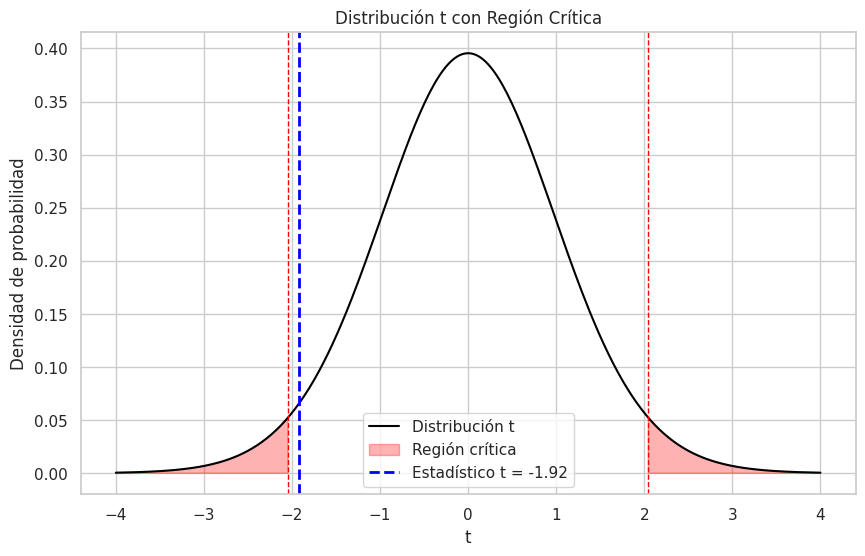

In [ ]:
# Gráfica de la distribución t
x = np.linspace(-4, 4, 300)
y = stats.t.pdf(x, df)

plt.figure(figsize=(10,6))
plt.plot(x, y, color='black', label='Distribución t')

# Región crítica
plt.fill_between(x, y, where=(x <= -t_critico) | (x >= t_critico), color='red', alpha=0.3, label='Región crítica')

# Estadístico t calculado
plt.axvline(t_stat, color='blue', linestyle='--', linewidth=2, label=f'Estadístico t = {t_stat:.2f}')

# Líneas de los valores críticos
plt.axvline(-t_critico, color='red', linestyle='--', linewidth=1)
plt.axvline(t_critico, color='red', linestyle='--', linewidth=1)

plt.title('Distribución t con Región Crítica')
plt.xlabel('t')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()
